<h1 style="text-align: center; color: purple;" markdown="1">Final Project by Group 22 </h1>

<br>

<h2 style="text-align: center; color: #012169" markdown="1">Xintong Cai, Sam Hu, Fanjiaxuan Zhang, Yuyao Zhou</h2>

## Table of Contents:
*  <a href='#the_destination1'> I)   Introduction & Motivation</a>
* <a href='#the_destination2'>  II)  Data: an overview</a>
* <a href='#the_destination3'> III) Methodology/Empirical Models </a>
* <a href='#the_destination4'> IV)  Result </a>
* <a href='#the_destination5'> V)   Conclusion </a>

* <a href='#the_destination6'> References </a>

## I) Introduction & Motivation

<a id='the_destination1'></a>

- As we become juniors, we are allowed to live outside campus. While searching for an apartment, we noticed that there seem to be several factors that affect the prices of housing more significantly than others. 
    - In the article “Analysis of Main Influence Factors for Housing Prices”, Rao and Ge (2015) observe that per-capita income, sales area of resident, and quantity of urban population are the main influential factors for the $residential$ housing prices. 
    - $Commercial$ real estate properties are similar to residential housing properties in certain aspects, yet not exactly the same. Gyourko (2009) records that the simple correlation between appreciation rates on owner occupied housing and commercial real estates is about 40%, which suggests that they are not affected by the same factors (as shown in Figure 3 below).  
   
- Curious about what natural factors (i.e., characteristics of the real estate itself) and external economic factors actually impact the sales prices of commercial real estate properties in the U.S., we begin our study.


![Picture title](image-20210503-181710.png)

- In this project, we aim to investigate whether GDP (by county), total area of the real estate, lot sizes, as well as the property type influence the price of commercial real estate properties. By utilizing the multiple linear regression model of sales prices  $$(y=\beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \beta_3 \cdot x_3 + ... +\beta_n \cdot x_n +  \mu)$$, we are able to examine if the explanatory variables affect commercial real estate properties. 

- In the following section, we will commence by presenting simple descriptive statistics as well as visualizations of the data we use.

## II) Data: an overview 
<a id='the_destination2'></a>




The data set we are using includes 9000 U.S. based commercial real estate listings for sale in 2017, organized by address, price, and other property details. 

We will select the variables of interest (`'Address','City','Owner Name','Mailing Address','Price','Number of Units', 'Total area', 'Number Of Stories', 'Lot Size', 'Type', 'Year Built'`) and then perform further data cleaning to prepare the data for analysis.

Due to the large amount of nulls in the variables such as `Number of Units`, and `Year Built`, we only provide the descriptive statistics and visualizations for `Address`, `Price`, and `Total area`, for which we feel certain to include in our model.


In [ ]:
# Initialization
!pip install gmaps
!pip install geopandas
!pip install geopy
!pip install stargazer
!pip install statsmodels
!pip install uszipcode
!pip isntall folium

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Import Necessary Packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import gmaps
import gmaps.datasets
import geopandas
import geopy
import getpass
import re
import folium
from folium.plugins import FastMarkerCluster

In [ ]:
#Import the dataset we want to use as a dataframe
df = pd.read_csv('data_housin.csv')[
    ['Address','City','Owner Name','Mailing Address','Price','Number of Units',
    'Total area', 'Number Of Stories', 'Lot Size', 'Type', 'Year Built']
]

#renname and adjust the columns of the dataframe
df['Price'] = df['Price'].str.replace('$','', regex = True).str.replace(',','',regex = True)
df['Total area'] = df['Total area'].str.replace(',','', regex = True).str.replace(' SF','',regex = True)
len(df.loc[df['Total area'].str.match(r"^\d+\s[a-zA-Z]+$"), ['Total area']])

0

- We start by looking at summary statistics of the dataset that we use.

In [ ]:
# summary statistics of the data that we use
df.describe()

,Address,City,Owner Name,Mailing Address,Price,Number of Units,Total area,Number Of Stories,Lot Size,Type,Year Built
count,9076,9076,3,3,9076,9076,9076,9076,9076,9076,9076
unique,8812,5031,3,3,3544,155,3491,23,4601,13,137
top,Access Denied\nAccess Denied\nYou are in breac...,,BAKE TECHNOLOGY PARK LLC,"550 NEWPORT CENTER DR, NEWPORT BEACH, CA 92660",3500000,,,,,Land,
freq,152,152,1,1,290,8527,4315,6181,1026,3232,5831


- df.head() offers a glimpse of what the first few rows of the data frame look like.

In [ ]:
df.head()

,Address,City,Owner Name,Mailing Address,Price,Number of Units,Total area,Number Of Stories,Lot Size,Type,Year Built
0,"6060 Electron Dr., Anchorage, AK, 99518","Anchorage, AK 99518 ·",ODEX INVESTMENTS V LLC,"1001 4TH AVE STE 4500, SEATTLE, WA 98154",10239431.0,,NaN,,"680,276 SF",Land,
1,"1901 Airport Way, Fairbanks, AK, 99701","Fairbanks, AK 99701 ·",SEATTLE SC PLAZA 2 LLC,"1331 N CALIFORNIA BLVD STE 170, WALNUT CREEK, ...",4050000.0,,10000.0,1,3.26 AC,Office,2006
2,"4510 Old International Airport Rd 99502, Ancho...","Anchorage, AK 99502 ·",NaN,NaN,3500000.0,,28521.0,,1.09 AC,Office,
3,"7645 W. Marigold Drive, Wasilla, AK, 99654","Wasilla, AK 99654 ·",BAKE TECHNOLOGY PARK LLC,"550 NEWPORT CENTER DR, NEWPORT BEACH, CA 92660",3267000.0,,NaN,,25 AC,Land,
4,"171 Muldoon Rd, Anchorage, AK, 99504","Anchorage, AK 99504 ·",NaN,NaN,5000000.0,,NaN,1,"81,893 SF",Retail,1978


- We then present the distribution of the commerical real estate prices in the dataset that we use (as shown in theh following plot).

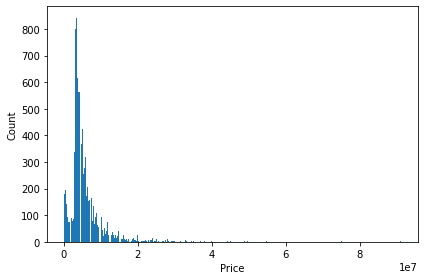

In [ ]:
#Check if total area is in other units
if len(df.loc[df['Total area'].str.match(r"^\d+\s[a-zA-Z]+$"), ['Total area']]) == 0:
    df['Total area'] = pd.to_numeric(df['Total area'], errors = 'coerce')

# Average the price that is in the form of "LowestPrice - HighestPrice"
df.loc[df['Price'].str.match(r"(\d+) - (\d+)"), ['Price']] = df['Price'].str.replace(r"(\d+) - (\d+)", lambda x: "{}".format(
    (int(x.group(1))+int(x.group(2)))/2
    ), regex = True)
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')

# plot the distribution of the prices
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x=df['Price'], bins = 'auto', rwidth = 0.85)
ax.set_xlabel("Price")
ax.set_ylabel("Count")
fig.tight_layout()
plt.show()

- Similarly, here's a plot of the distribution of the column "total area" in the data frame.

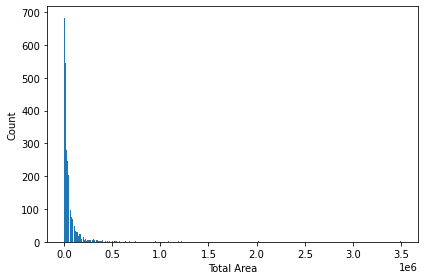

In [ ]:
# plot the distribution of the variable "total area"
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x=df['Total area'], bins = 'auto', rwidth = 0.85)
ax.set_xlabel("Total Area")
ax.set_ylabel("Count")
fig.tight_layout()
plt.show()

- Moreover, the frequency table below shows the number of counts for each type of commercial real estates that belong to the qualitative variable "property type". 

In [ ]:
df['Type'].value_counts()

Land                     3232
Retail                   2147
Industrial               1187
Office                   1058
Multifamily               588
Hotel & Motel             271
Special Purpose           186
Agricultural              152
                          152
Residential Income         45
Senior Housing             27
Sport & Entertainment      23
Health Care                 8
Name: Type, dtype: int64

In [ ]:
APIKEY = getpass.getpass()

In [ ]:
# Geocoding addresses into geographic coordinates
from geopy.extra.rate_limiter import RateLimiter
locator = geopy.GoogleV3(api_key=APIKEY, timeout=20)
geocode = RateLimiter(locator.geocode, min_delay_seconds = 0.3)
df.loc[:,'location'] = df.loc[:,'Address'].apply(geocode)
df.loc[:,'point'] = df.loc[:,'location'].apply(lambda loc: tuple(loc.point) if loc else None)
#df.to_csv('data.csv')

In [ ]:
#Correct file format
df = pd.read_csv("data.csv").drop(columns='Unnamed: 0')
df.loc[:,'point'] = df.loc[:,'point'].apply(lambda x: str(x)).apply(lambda x: x.replace(' ','').replace('(','').replace(')','').split(',') if x else None)

#extract geo-locations, drop na's
df[['latitude','longitude','altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)
df_map = df[pd.notna(df['location'])].copy()

#Property Geographic Location Distribution
folium_map = folium.Map(location=[38.996990,-101.463420],
                        zoom_start=5,
                        tiles='CartoDB dark_matter')


FastMarkerCluster(data=list(zip(df_map['latitude'].values, df_map['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

- The following block helps us convert the units of all of the observations "Total area" and "Lot Size" into square feet (sf), since some of them are recorded in different units.

In [ ]:
# handle the units of the variables "Total area" and "Lot Size": 
#convert other units to square feet (sf)
df_map['Total area'] = df_map['Total area'].str.replace(',','', regex = True).str.replace(' SF','',regex = True)
len(df_map.loc[df['Total area'].str.match(r"^\d+\s[a-zA-Z]+$"), ['Total area']])

# len = 0 说明Total Area 全部满足 "*digit* SF" 格式
df_map.loc[:,'Total area'] = pd.to_numeric(df_map['Total area'], errors = 'coerce')

#handle Lot Size
df_map['Lot Size'] = df_map['Lot Size'].str.replace(',','', regex = True)

def unit_conversion(x):
    match = re.match(r"([0-9\.]+)\s(\w+)", x)
    if match:
        if match.group(2) == "AC":
            return str(pd.to_numeric(match.group(1)) * 43560)
        else:
            return str(match.group(1))
    else:
        match = re.match(r"([0-9\.]+)\s-\s([0-9\.]+)\s(\w+)", x)
        if match:
            if match.group(3) == "AC":
                return str(
                    (
                        pd.to_numeric(match.group(1)) +
                        pd.to_numeric(match.group(2))
                    ) / 2 * 43560
                )
            else:
                return str(
                    (
                        pd.to_numeric(match.group(1)) +
                        pd.to_numeric(match.group(2))
                    ) / 2
                )

df_map.loc[:,'Lot Size'] = pd.to_numeric(df_map.loc[:,'Lot Size'].apply(lambda x: unit_conversion(x)), errors = "coerce")
df_map.describe()


,Price,Total area,Lot Size
count,8.880000e+03,4.753000e+03,8.031000e+03
mean,5.852507e+06,5.567818e+04,2.346237e+07
std,5.621658e+06,1.081533e+05,1.297266e+09
min,8.499000e+03,0.000000e+00,1.700000e-01
25%,3.375000e+06,1.073600e+04,6.316200e+04
50%,4.414450e+06,2.796000e+04,2.395800e+05
75%,6.500000e+06,6.000000e+04,1.001880e+06
max,9.116890e+07,3.495000e+06,1.141925e+11


- Import and inspect a new dataset: GDP by county, retreived from [U.S. Bureau of Economic Analysis (BEA)](https://www.bea.gov/)

In [ ]:
# import and inspect a new dataset: GDP by county
import pandas as pd
gdp_all = pd.read_csv("./gdp.csv")
gdp_county = gdp_all.copy()[['GeoName','Description','2019']]
def to_int(x):
    try:
        return int(x)
    except:
        return None
gdp_county.loc[:,"2019"] = gdp_county.loc[:,"2019"].apply(lambda x: to_int(x))
gdp_county = pd.pivot_table(gdp_county, index = "GeoName", columns=['Description'], values='2019')
gdp_county.columns = gdp_county.columns.get_level_values(0)
gdp_county = gdp_county.reset_index()
gdp_county = gdp_county[['GeoName', "All industry total"]]

#Subset data containing county
gdp_county = gdp_county[gdp_county['GeoName'].astype(str).str.match(".+?,.+?")]
gdp_county.to_csv('test_gdp.csv')
#gdp_county.groupby('GeoName').filter(lambda x: len(x['All industry total'].unique())>1)
gdp_county = gdp_county[gdp_county['GeoName'].apply(lambda x:not bool(re.search("[\*\+\(\)]", x)))]



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


- Merge the variable GDP by county dataset with the commercial real estate dataset so that they become 1 dataframe (dataset).

In [ ]:
# Merge the variable GDP by county dataset with the commercial real estate dataset

from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)

def gdp_lookup(x):
    match = re.match(r"^\w+\,\s([A-Z]{2})\s(\d{5}).+$", x)
    if match:
        zipcode = search.by_zipcode(match.group(2))
        try:
            county_name = zipcode.to_dict()['county'].replace(" County","").replace(" county", "")
            key = county_name + ", " + match.group(1)
            gdp = gdp_county[gdp_county["GeoName"].str.match(key)]['All industry total'].tolist()[0]
            if pd.isna(gdp):
                return None
            if isinstance(gdp, (float, int)):
                return gdp
            else:
                return None
        except:
            #print(match.group(1)+' '+match.group(2))
            return None
        

df_map['gdp'] = df_map['City'].apply(lambda x:gdp_lookup(x))
df_map.describe()



     |████████████████████████████████| 453 kB 25.7 MB/s 
     |████████████████████████████████| 78 kB 17.2 MB/s 
     |████████████████████████████████| 1.5 MB 77.2 MB/s 
     |████████████████████████████████| 160 kB 86.5 MB/s 
     |████████████████████████████████| 45 kB 8.2 MB/s 
     |████████████████████████████████| 41 kB 1.9 MB/s 
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 1.3.24
    Not uninstalling sqlalchemy at /shared-libs/python3.7/py/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'SQLAlchemy'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pybigquery 0.6.1 requires sqlalchemy<1.4.0dev,>=1.1.9, but you have sqlalchemy 1.4.12 which is incompatible.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command

,Price,Total area,Lot Size,gdp
count,8.880000e+03,4.753000e+03,8.031000e+03,6.162000e+03
mean,5.852507e+06,5.567818e+04,2.346237e+07,6.326029e+07
std,5.621658e+06,1.081533e+05,1.297266e+09,1.093706e+08
min,8.499000e+03,0.000000e+00,1.700000e-01,1.840300e+04
25%,3.375000e+06,1.073600e+04,6.316200e+04,6.305893e+06
50%,4.414450e+06,2.796000e+04,2.395800e+05,2.360411e+07
75%,6.500000e+06,6.000000e+04,1.001880e+06,7.217508e+07
max,9.116890e+07,3.495000e+06,1.141925e+11,8.194464e+08


- We must eliminate empty or NULL values in the dataset because these values are useless and obstructive to our conduction of regression analysis.

In [ ]:
# eliminate empty or NULL values in the dataset

#df[df['Lot Size'] == "0.17 SF"]
#df['Lot Size'].str.replace(',','').tolist()

# Check for abnormalities in data
print("Total area, first 10 entries, sorted: ")
print(np.sort(df_map['Total area']).tolist()[:10])
# Reference by to the original data set
print(df[df['Total area'] == "0 SF"]['Total area'])

print("\n\nLot Size, <= 10 SF, referenced back to the original data:")
df.iloc[df_map[df_map['Lot Size'] <= 10].index]

Total area, first 10 entries, sorted: 
[0.0, 0.0, 0.0, 1.0, 10.0, 69.0, 432.0, 864.0, 885.0, 890.0]
3926    0 SF
6351    0 SF
6667    0 SF
8163    0 SF
Name: Total area, dtype: object


Lot Size, <= 10 SF, referenced back to the original data:


,Address,City,Owner Name,Mailing Address,Price,Number of Units,Total area,Number Of Stories,Lot Size,Type,Year Built,location,point,latitude,longitude,altitude
99,"3322 South Memorial Pkwy SW, Huntsville, AL, 3...","Huntsville, AL 35801 ·",NaN,NaN,5800000.0,,"90,546 SF",,6.08 SF,Office,1961,"3322 S Memorial Pkwy, Huntsville, AL 35801, USA","[34.6973637, -86.585054, 0.0]",34.6973637,-86.585054,0.0
102,"1821 Cherokee Ave SW, Cullman, AL, 35055","Cullman, AL 35055 ·",NaN,NaN,3876923.0,,"7,700 SF",1,1.06 SF,Retail,2015,"1821 Cherokee Ave SW, Cullman, AL 35055, USA","[34.1541403, -86.84123029999999, 0.0]",34.1541403,-86.84123029999999,0.0
209,"5805 Rogers Avenue, Fort Smith, AR, 72903","Fort Smith, AR 72903 ·",NaN,NaN,5865000.0,,"22,000 SF",,2.32 SF,Retail,2016,"5805 Rogers Ave, Fort Smith, AR 72903, USA","[35.360998, -94.36811639999999, 0.0]",35.360998,-94.36811639999999,0.0
239,"866 S. 48th Street, Springdale, AR, 72762","Springdale, AR 72762 ·",NaN,NaN,3500000.0,,"21,000 SF",,1.89 SF,Retail,,"866 S 48th St, Springdale, AR 72762, USA","[36.1783662, -94.1855372, 0.0]",36.1783662,-94.1855372,0.0
242,"3700 E. Johnson Avenue, Jonesboro, AR, 72401","Jonesboro, AR 72401 ·",NaN,NaN,3433402.0,,,,2 - 5.63 SF,Land,,"3700 E Johnson Ave, Jonesboro, AR 72401, USA","[35.859609, -90.653826, 0.0]",35.859609,-90.653826,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8839,"1313-1327 Plaza East, Charleston, WV, 25301","Charleston, WV 25301 ·",NaN,NaN,7000000.0,,,1,6.38 SF,Retail,,"1313-1327 Plaza East, Charleston, WV 25301, USA","[38.3473616, -81.6230289, 0.0]",38.3473616,-81.6230289,0.0
8889,"2502 Melodi Ln, Casper, WY, 82601","Casper, WY 82601 ·",NaN,NaN,1840000.0,,"17,720 SF",,7.03 SF,Industrial,1977,"2502 Melodi Ln, Casper, WY 82601, USA","[42.8919936, -106.3533236, 0.0]",42.8919936,-106.3533236,0.0
8944,"528 County Rd, Evanston, WY, 82930","Evanston, WY 82930 ·",NaN,NaN,1000000.0,,,,1.26 SF,Retail,,"528 County Rd, Evanston, WY 82930, USA","[41.2826667, -110.9617006, 0.0]",41.2826667,-110.9617006,0.0
9040,"5441 Swanson Rd, Gillette, WY, 82718","Gillette, WY 82718 ·",NaN,NaN,690000.0,,"7,750 SF",,0.62 SF,Industrial,,"5441 Swanson Rd, Gillette, WY 82718, USA","[44.2444924, -105.478833, 0.0]",44.2444924,-105.478833,0.0


- It seems impossible for any commericial property to have less than 10SF for either their total area or lot size. Therefore, we postulate that the abnormalities originated from the original data set, possibly caused by scraping errors.
- Therefore, we choose to drop the entries where "total area" or "lot size" <= 10 SF

In [ ]:
# drop the entries where area < 10 SF
df_map['Total area'] = df_map[df_map['Total area'] >= 10]['Total area']
df_map['Lot Size'] = df_map[df_map['Lot Size'] >= 10]['Lot Size']

df_map.describe()

,Price,Total area,Lot Size,gdp
count,8.880000e+03,4.749000e+03,7.773000e+03,6.162000e+03
mean,5.852507e+06,5.572508e+04,2.424113e+07,6.326029e+07
std,5.621658e+06,1.081868e+05,1.318615e+09,1.093706e+08
min,8.499000e+03,1.000000e+01,1.000000e+01,1.840300e+04
25%,3.375000e+06,1.080000e+04,7.230960e+04,6.305893e+06
50%,4.414450e+06,2.800000e+04,2.613600e+05,2.360411e+07
75%,6.500000e+06,6.000000e+04,1.048925e+06,7.217508e+07
max,9.116890e+07,3.495000e+06,1.141925e+11,8.194464e+08


In [ ]:
#check if there are still NULL values existing in the data frame
if not (pd.isna(df_map['Type']).any() & pd.isnull(df_map['Type']).any()):
    print ("no null exists in 'type'")

no null exists in 'type'


In [ ]:
import getpass
APIKEY = getpass.getpass()

## Visualization: 
- A weighted heatmap that shows the geographic distribution and price level of the commerical real estate properties in the dataset.
- The color gradient represents price level, and a warmer hue stands for higher prices.

In [ ]:
# Visualization: distribution of the geographic locations of the commerical real
# estate properties in the dataset
import gmaps
import gmaps.datasets
gmaps.configure(api_key=APIKEY)

df_visual = df_map[['Price','latitude','longitude']].copy()
df_visual['latitude'] = pd.to_numeric(df_visual['latitude'])
df_visual['longitude'] = pd.to_numeric(df_visual['longitude'])

map1 = gmaps.figure()

map1.add_layer(gmaps.heatmap_layer(df_visual[['latitude', 'longitude']], weights = df_visual['Price']))
map1
#df_visual.to_csv("visual.csv")

Figure(layout=FigureLayout(height='420px'))

![heat_map1](heatmap_1.png)
![heat_map2](map.png)

From the heatmap, We can see commercial property prices tend to be much higher in major metropolitan areas. The New York City and its neighboring areas should have the highest commerical property price in the U.S..

## III) Methodology/Empirical Model

<a id='the_destination3'></a>

- We would like to find the correlations between sale prices of commercial real estate properties and possible influencing factors. We considered address, GDP, property area, lot size, property type, year built, and floor as possible nfluencing factors at first. Thus, we came up with the multiple linear regression model below to investigate how strong their relationship are. And our preliminary model was $Price = \beta_0 + \beta_1 \cdot Address + \beta_2 \cdot GDP + \beta_3 \cdot Area + \beta_4 \cdot LotSize + \beta_5 \cdot PropertyType$ $+  \beta_6 \cdot YearBuilt + \beta_7 \cdot Floor + \mu$. 

- Nevertheless, the independent variables in the preliminary regression model require further examination and some of them might be removed due to multicollinearity, incomplete observations, lack of statistical meaning, and etc. 

    - In a multiple linear regression model, we need to check if the independent variables are highly correlated to each other and prevent them from being in the same regression model (multicollinearity problem). 

    - After conducting analysis and computing summary statistics of our dataset, we found that some variables contain numerous $nulls$ or empty observations. Such incomplete information leads us to decide to remove these potential explanatory variables from our multiple regression models. The "incomplete" factors that we have discovered are $YearBuilt$ and $Floor$.

    - Varaible $Address$ is not quantified by numerical values, which makes it meaningless to our empirical empirical analysis. We decide to simply show the distribution of address instead of incorporating it into the regression models.


- Consequently, the independent variables included in our models are $GDP$, $Area$, $PropertyType$, and $LotSize$. We designed 3 models to aid our study.

    Model 1: 
$Price = \beta_0 + \beta_1 \cdot GDP$ $+ \beta_2 \cdot Area + \beta_3 \cdot LotSize + \beta_4 \cdot PropertyType + \mu$  $ (1)$. 
    
    Additionally, we will apply the following model to obtain the fitted parameters as percentage change of the price, which we call model 2: 
$log(Price) = \beta_0 + \beta_1 \cdot GDP$ $+ \beta_2 \cdot Area + \beta_3 \cdot LotSize + \beta_4 \cdot PropertyType + \mu$ $ (2)$.

    We would also like to see the elasticity of price (i.e., the price's sensitivity to change in explanatory variables') by studying model 3: 
$log(Price) = \beta_0 + \beta_1 \cdot log(GDP)$ $+ \beta_2 \cdot log(Area) + \beta_3 \cdot log(LotSize) + \mu$ $ (3)$.

- Null Hypothesis ($H_0$)

    - Based on Trung and Quan's study(2019), the natural factor of real estates -to which  our explanatory variables belong to- generally has little impact on the real estate prices with significance level 0.05. This project will explore the detailed elements in the natural factor category, which may have different conclusion about the correlation. However, to have a nice guessing, our hypotheses for the models will follow the conclusion from their study. 

    - That is, we hypothesize that the independent variables do not affect the sale prices of commercial real estate properties.


## IV) Results

<a id='the_destination4'></a>

In [ ]:
# Multiple Regression Analysis Models

# make a copy of the data frame that we will use
df_regression = df_map.copy()

# rename the variable "Total area" and "Lot Size"
df_regression.rename(columns = {'Total area':'Area', 'Lot Size':'LotSize'}, inplace = True)

# run regression models; we choose "Land" as the treatment group for the qualitative
# variable property type
model1= smf.ols(formula='Price ~  gdp + Area + LotSize + C(Type, Treatment("Land"))', data=df_regression).fit()

model2 = smf.ols(formula='np.log(Price) ~  gdp + Area + LotSize + C(Type, Treatment("Land"))', data=df_regression).fit()

model3 = smf.ols(formula='np.log(Price) ~ np.log(gdp) + np.log(Area) + np.log(LotSize)', data=df_regression).fit()


# presenting result using Stargazer()
st = Stargazer([model1, model2, model3])
from IPython.core.display import HTML
HTML(st.render_html())


- Interpretation of the result
    - In model 1 and 2, the variable "GDP" is significant at 0.1 and 0.01 significance level, respectively; i.e., we are at least 90% that the coefficient for "GDP" is not zero and reject the null hypothesis that GDP (by county) does not affect sales prices. Similarly, result from model 3 suggests that we are 99% confident that log(GDP) affect log(Price). Therefore, the variable GDP (by county) does help determine sales prices of commerical real estate properties. Every additional unit increase in GDP can lead to 0.001 units of increase in the price.
    - The variable "Area" is significant at the 0.01 significance level acrossall of the 3 models; i.e., we are at least 99% that the coefficient for "Area" is not zero and we reject the null hypothesis that area of the property does not affect sales prices. Thus, the variable does influence price: every 1-unit increase in area of the real estate might result in 22.467 units of increase in the price.
    - We realize that the variable "LotSize" is not significant in both model 1 and model 2. Thus, we fail to reject the hypothesis that area does not sales prices. However, in model 3, we notice that the elasticity for "LotSize" of price (i.e. the coeeficient for "LotSize") is nonzero.
    - According to results from both model 1 and 2, we find out that only the following 4 types of properties yield significatn coefficients when the type "land" is used: industrial, multifamily, office, and retail. Thus, we know that properties of these 4 types have prices that significantly differ from those of type "land".
    

## V) Conclusion

<a id='the_destination5'></a>

- Our project attempts to investigate whether GDP (by county), area of the real estate, lot size, and the property type affect the sales prices of commerical real estate properties in the U.S. 
    - Area seems to be the most significant influencing factor of prices, while lot size seems to be the least.
    - Additionally, being one of the 4 categories which include industrial, multifamily, office, and retail, can significantly affect the price of a commerical real estate property when compared to the property type "land".

- Overall, we confirm that GDP (by county), area of the real estate, as well as the property type have influence on the sales prices of commerical real estate properties.

## References
<a id='the_destination6'></a>

DataWorld (2017). website: https://data.world/dmikebishop/commercial-real-estate-for-sal.

Gyourko, Joseph. Understading Commercial Real estate: Just How Different from Housing Is It? NBER Working Paper No.14708, https://www.nber.org/system/files/working_papers/w14708/w14708.pdf.

Rao, Congjun and Yangqiu Ge. Analysis of Main Influence Factors for Housing Prices. https://www.atlantis-press.com/article/25841966.pdf.

Trung, D. Pham and Nguyen G. Quan. Factors Affecting the Price of the Real Estate: A Case of Ho Chi Minh City. https://www.eajournals.org/wp-content/uploads/Factors-Affecting-The-Price-of-the-Real-Estate.pdf.

In [5]:
!jupyter nbconvert --to html Final_Project_Group22.ipynb

[NbConvertApp] Converting notebook Final_Project_Group22.ipynb to html
[NbConvertApp] Writing 781774 bytes to Final_Project_Group22.html


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=500bf0d7-fbb9-4854-bdae-bde73a83fbf2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>